In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [56]:
data = pd.read_csv("./DATA/preprocessing_1999_2022.csv")

In [57]:
data.head(5)

,Cause of death,Age of mother,Mother's education,Birth weight,Age of infant at death,Deaths,Births,Death rate per 1000,Year
0,Certain infectious and parasitic diseases,15-19,High School Incomplete,500 - 999,672 - 8736,14,1927,7.265179,1999
1,Certain infectious and parasitic diseases,15-19,High School Incomplete,2500 - 2999,672 - 8736,11,31891,0.344925,1999
2,Certain infectious and parasitic diseases,15-19,High School Incomplete,3000 - 3499,672 - 8736,10,31891,0.313568,1999
3,Certain infectious and parasitic diseases,20-24,High School Incomplete,500 - 999,672 - 8736,15,1179,12.722646,1999
4,Certain infectious and parasitic diseases,20-24,High School Graduate,500 - 999,672 - 8736,17,2490,6.827309,1999


 Câu hỏi: Liệu trình độ học vấn của mẹ có mối quan hệ như nào trong việc sinh và tử vong của trẻ?


- Lợi ích của việc trả lời câu hỏi này: nắm được bậc học sẽ quan trọng như nào trong việc trẻ phát triển 
- Trả lời câu hỏi này bằng cách: 
    + Tìm số ca sinh của từng trình độ học vấn
    + Tìm tổng số ca tử của từng  trình độ học vấn.
    + Vẽ biểu đồ so sánh 2 cái số ca sinh và số ca tử
    + vẻ biểu đồ boxlplot để thể hiện cho từng tỉ lệ học vấn với tỉ lệ tử trên 1000 

- Preprocessing

In [58]:
data.columns

Index(['Cause of death', 'Age of mother', 'Mother's education', 'Birth weight',
       'Age of infant at death', 'Deaths', 'Births', 'Death rate per 1000',
       'Year'],
      dtype='object')

 Bước 1 : Tổng số ca sinh của từng trình độ học vấn

In [59]:
groupby_data_birth = data.groupby('Mother\'s education')['Births'].mean().round(3)
# Chuyển kết quả thành DataFrame 
groupby_data_birth = groupby_data_birth.reset_index()
groupby_data_birth

,Mother's education,Births
0,College Graduate or Higher,4480.616
1,Elementary School or Less,2054.657
2,High School Graduate,10027.584
3,High School Incomplete,9787.072
4,Not Stated,140.318
5,Some College Education,7763.241


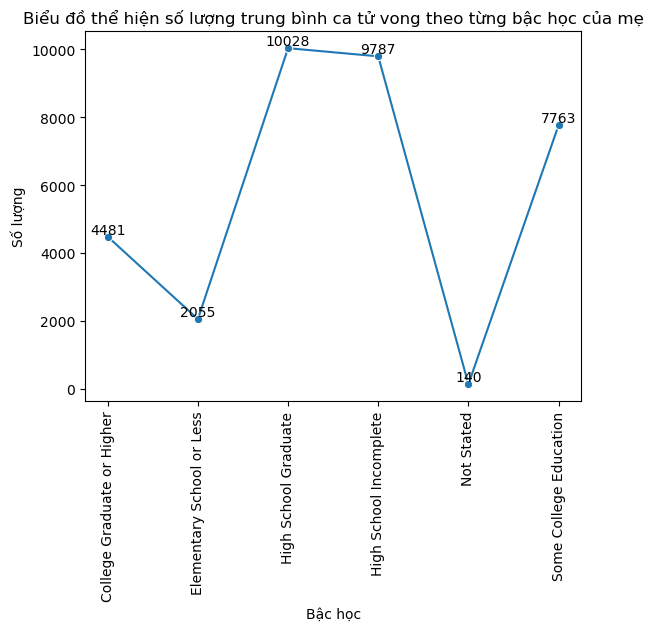

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

#Vẽ biểu đồ lineplot
sns.lineplot(
    x=groupby_data_birth["Mother's education"], 
    y=groupby_data_birth["Births"], 
    marker="o"  #  Thêm dấu marker trên đường
)

#Cài đặt tiêu đề và nhãn
plt.title("Biểu đồ thể hiện số lượng trung bình ca tử vong theo từng bậc học của mẹ")
plt.ylabel("Số lượng")
plt.xlabel("Bậc học")
plt.xticks(rotation=90)   # Xoay nhãn trên trục x

#Thêm giá trị lên từng điểm dữ liệu
for x, y in zip(groupby_data_birth["Mother's education"], groupby_data_birth["Births"]):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=10, color='black')

#Hiển thị biểu đồ
plt.show()


 Bước 2 : Tổng số ca tử vọng  của từng bậc học

In [61]:
groupby_data_death = data.groupby('Mother\'s education')['Deaths'].mean().round(3)
#Chuyển kết quả thành DataFrame 
groupby_data_death = groupby_data_death.reset_index()
groupby_data_death

,Mother's education,Deaths
0,College Graduate or Higher,21.577
1,Elementary School or Less,14.024
2,High School Graduate,24.234
3,High School Incomplete,22.861
4,Not Stated,19.942
5,Some College Education,22.641


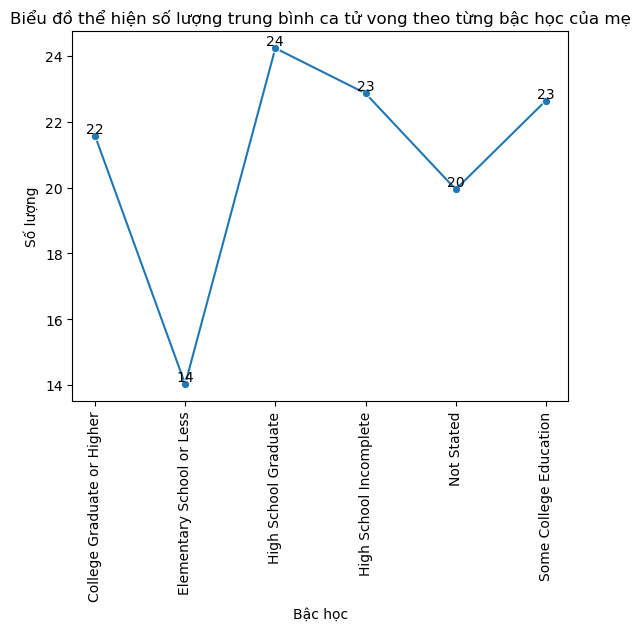

In [62]:
#Vẽ biểu đồ lineplot
sns.lineplot(
    x=groupby_data_death["Mother's education"], 
    y=groupby_data_death["Deaths"], 
    marker="o"   # Thêm dấu marker trên đường
)

# Cài đặt tiêu đề và nhãn
plt.title("Biểu đồ thể hiện số lượng trung bình ca tử vong theo từng bậc học của mẹ")
plt.ylabel("Số lượng")
plt.xlabel("Bậc học")
plt.xticks(rotation=90)   #  Xoay nhãn trên trục x

for x, y in zip(groupby_data_death["Mother's education"], groupby_data_death["Deaths"]):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=10, color='black')
    
# Hiển thị biểu đồ
plt.show()

In [63]:
data_death_rate = data.groupby("Mother's education")["Death rate per 1000"].mean()
data_death_rate = data_death_rate.reset_index()
data_death_rate

,Mother's education,Death rate per 1000
0,College Graduate or Higher,89.604894
1,Elementary School or Less,211.820018
2,High School Graduate,35.763855
3,High School Incomplete,58.784734
4,Not Stated,181.144206
5,Some College Education,66.135289


/tmp/ipykernel_19025/3811124440.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(data_death_rate["Mother's education"], rotation=90)


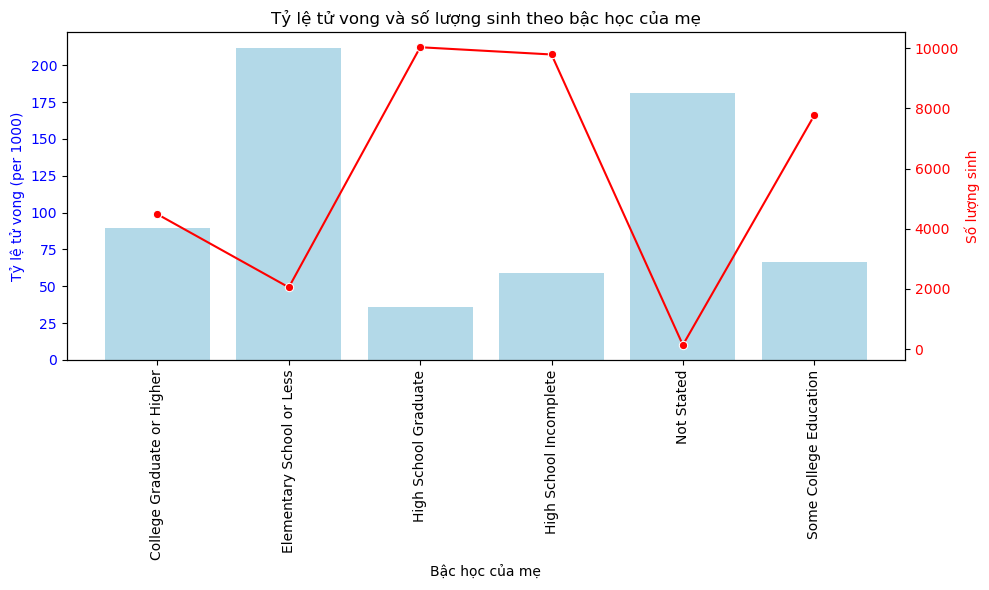

In [64]:
#  Tạo một figure và axis
fig, ax1 = plt.subplots(figsize=(10, 6))   # Kích thước của biểu đồ

# Trục y đầu tiên (cột: Death rate per 1000)
sns.barplot(
    x=data_death_rate["Mother's education"], 
    y=data_death_rate["Death rate per 1000"], 
    ax=ax1, 
    color='skyblue', 
    alpha=0.7
)
ax1.set_ylabel("Tỷ lệ tử vong (per 1000)", color='blue')
ax1.set_xlabel("Bậc học của mẹ")
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(data_death_rate["Mother's education"], rotation=90)
ax1.set_title("Tỷ lệ tử vong và số lượng sinh theo bậc học của mẹ")

# Trục y thứ hai (đường: Births)
ax2 = ax1.twinx()   # Tạo trục y thứ hai chia sẻ trục x
sns.lineplot(
    x=groupby_data_birth["Mother's education"], 
    y=groupby_data_birth["Births"], 
    ax=ax2, 
    color='red', 
    marker='o'
)
ax2.set_ylabel("Số lượng sinh", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Phân tích mối quan hệ giữa học vấn của mẹ, số lượng sinh, và tỷ lệ tử vong của trẻ**

**1. Lý do chọn biểu đồ:**
- **Biểu đồ đường (Line chart):**  
  - Biểu diễn xu hướng và sự thay đổi số lượng sinh và tử vong qua từng bậc học.  
  - Phù hợp để nhận biết mức tăng giảm cụ thể và xu hướng tổng quát.  

- **Biểu đồ kết hợp (Dual-axis chart):**  
  - Kết hợp giữa số lượng sinh (biểu diễn bằng cột) và tỷ lệ tử vong (biểu diễn bằng đường) trên cùng một trục x.  
  - Hai trục y riêng biệt giúp dễ dàng so sánh và phân biệt hai chỉ số có đơn vị khác nhau.  
  - Hữu ích khi phân tích tương quan giữa hai yếu tố có liên quan mật thiết.  

---

**2. Phân tích chi tiết:**

**College Graduate or Higher (Tốt nghiệp đại học hoặc cao hơn):**
- **Số lượng sinh:**  
  - Trung bình, khoảng **4,481 trường hợp**.  
  - Nhóm này không có số lượng sinh cao nhất, cho thấy các yếu tố xã hội và kế hoạch hóa gia đình được thực hiện tốt.  
- **Tỷ lệ tử vong:**  
  - Thấp, chỉ **khoảng 100/1000 trẻ**.  
  - Trình độ học vấn cao giúp cải thiện điều kiện sống, tiếp cận dịch vụ y tế, và kiến thức chăm sóc trẻ.  

 **Elementary School or Less (Học tiểu học hoặc thấp hơn):**
- **Số lượng sinh:**  
  - Thấp nhất, khoảng **2,055 trường hợp**.  
- **Tỷ lệ tử vong:**  
  - Cao nhất, **200/1000 trẻ**.  
  - Sự thiếu hụt về kiến thức, điều kiện kinh tế, và khả năng tiếp cận dịch vụ y tế là nguyên nhân chính.  

 **High School Graduate (Tốt nghiệp trung học phổ thông):**
- **Số lượng sinh:**  
  - Cao nhất, khoảng **10,028 trường hợp**.  
  - Nhóm này chiếm tỷ trọng lớn trong dân số.  
- **Tỷ lệ tử vong:**  
  - Trung bình, khoảng **75-100/1000 trẻ**.  
  - Điều kiện sống và chăm sóc y tế ở mức trung bình.  

 **High School Incomplete (Chưa hoàn thành trung học phổ thông):**
- **Số lượng sinh:**  
  - Cao thứ hai, khoảng **9,787 trường hợp**.  
- **Tỷ lệ tử vong:**  
  - Thấp, chỉ **dưới 50/1000 trẻ**.  
  - Nhóm này nhận được hỗ trợ y tế tốt hoặc giáo dục cơ bản về chăm sóc trẻ.  

 **Not Stated (Chưa bắt đầu hoặc không rõ):**
- **Số lượng sinh:**  
  - Cực thấp, chỉ **140 trường hợp**.  
- **Tỷ lệ tử vong:**  
  - Rất cao, thường thuộc nhóm cao nhất.  
  - Nhóm này có thể là tầng lớp yếu thế, gặp khó khăn trong tiếp cận dịch vụ y tế hoặc báo cáo thiếu chính xác.  

 **Some College Education (Có học đại học nhưng chưa tốt nghiệp):**
- **Số lượng sinh:**  
  - Cao thứ ba, khoảng **7,763 trường hợp**.  
- **Tỷ lệ tử vong:**  
  - Thấp, chỉ **dưới 50/1000 trẻ**.  
  - Nhóm này đủ kiến thức và điều kiện để chăm sóc trẻ tốt hơn.

---

 **Kết luận:**
- **Tương quan mạnh mẽ giữa học vấn của mẹ và tỷ lệ tử vong của trẻ:**  
  - **Học vấn càng cao, tỷ lệ tử vong càng thấp.**  
- **Nhóm có học vấn thấp (Elementary School or Less):**  
  - Có tỷ lệ tử vong cao nhất.  
- **Nhóm không rõ thông tin (Not Stated):**  
  - Tỷ lệ tử vong cao, có thể do thiếu khả năng tiếp cận dịch vụ y tế hoặc báo cáo thiếu chính xác.  

---

 **Đề xuất:**
- **Hỗ trợ nhóm có học vấn thấp:**  
  - Cung cấp các chương trình giáo dục miễn phí về sức khỏe sinh sản và chăm sóc trẻ em.  
  - Đưa ra chính sách khuyến khích giáo dục bậc cao hơn cho phụ nữ.  

- **Cải thiện tiếp cận dịch vụ y tế:**  
  - Mở rộng các dịch vụ y tế công cộng, đặc biệt ở vùng sâu vùng xa.  
  - Triển khai các chương trình tiêm chủng và kiểm tra sức khỏe cho mẹ và trẻ.  

- **Nâng cao nhận thức về tầm quan trọng của dữ liệu:**  
  - Nhóm "Not Stated" cho thấy tầm quan trọng của việc cải thiện hệ thống báo cáo dữ liệu.  

---

 **5. Nhận định chung:**
Phân tích cho thấy học vấn của mẹ là một trong những yếu tố quan trọng nhất ảnh hưởng đến tỷ lệ tử vong và số lượng sinh của trẻ. Cần có các biện pháp giáo dục và chính sách y tế hiệu quả để cải thiện tình trạng này, đặc biệt ở nhóm dễ bị tổn thương.
